In [1]:
# Imports
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

import load_data as ld
import analysis as ana
import global_vars as gv

from PIL import Image

In [2]:
data = ld.load_data()

In [8]:
def load_img(new=False):
    if new:
        upper_left = str(np.min(data["lat"])) + "," + str(np.min(data["long"]))
        lower_right = str(np.max(data["lat"])) + "," + str(np.max(data["long"]))
        coords = lower_right + "," + upper_left
        print(coords)

        key = "wTPDkAtbI9q93RXHsKO1JwWxsFfB4Ao2"
        query = "https://open.mapquestapi.com/staticmap/v5/map?key=" + key + "&boundingBox=" + coords + "&size=600,400"  # TODO: Normalize size. Calculate size by bounding boxes

        response = requests.get(query)
        imageStream = io.BytesIO(response.content)
        image = Image.open(imageStream)
        image.save("images/org_data" + upper_left + "," + lower_right + ".jpg")

        return image

    return Image.open("images/org_data.jpg")

14469WVD 0.26482450530486695
14469WVD_in 0.7043026831200415
26-Utica 0.7295935315931318
532 Deframe Ct Golden, CO 0.7518123451732545
Bear Valley Visitor Center -0.05941694368492887
Dudley St 0.058327627563080506
Fairmount 0.1887930724798699
Fruitdale 0.6906670543740621
Golden Colorado 0.963862212725977
Golden, CO 0.9553194077675378
Lamb Ln 0.9113920084874085
Linda Park Addition 0.6300433427003396
Lumberg Elementary 0.9349614896885062
North Table Mountain 0.9605469914872504
RAS Rock ave 0.7020125112817248
W. 19th Pl. & Applewood Dr. 0.6118805716452926
West 8th 0.09659561554158158
West Denver PA-II 0.9341392588378166


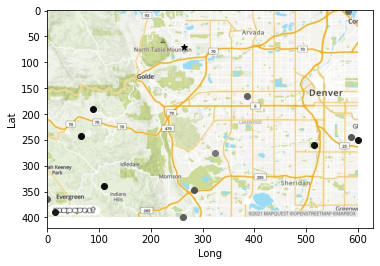

In [34]:
image = load_img()
plt.imshow(image)
plt.plot()

reference_location = "Arvada"
for location in np.unique(data["location"]):
    selected_df = data[data["location"] == location]
    lat = selected_df["lat"].iloc[0]
    min_lat = np.min(data["lat"])
    max_lat = np.max(data["lat"])
    lat = 400 - 400 * (lat - min_lat) / (max_lat - min_lat)  # Make negative

    long = selected_df["long"].iloc[0]
    min_long = np.min(data["long"])
    max_long = np.max(data["long"])
    long = 600 * (long - min_long) / (max_long - min_long)

    rmse = ana.get_rmse(data, reference_location, location) / 170  # TODO Make this dynamic
    if location == reference_location:
        color = cm.Greys(1.0)
        plt.scatter(long, lat, c=[color], marker="*")
    else:
        # color = cm.Greys(rmse)
        corr = get_cor(data, reference_location, location)
        print(location, corr)
        color = cm.Greys(corr)
        plt.scatter(long, lat, c=[color])
    plt.xlabel("Long")
    plt.ylabel("Lat")
plt.show()

In [27]:
def get_cor(data, name_a, name_b):
    df_a = data[data["location"] == name_a]
    df_b = data[data["location"] == name_b]

    # Merge both dfs on date and get corr of both ppm's
    merged_df = df_a.merge(df_b, on=[gv.date_name])
    ppm_x_name = gv.ppm_name + "_x"
    ppm_y_name = gv.ppm_name + "_y"

    corr = merged_df[ppm_x_name].corr(merged_df[ppm_y_name])

    # plt.plot(merged_df[gv.date_name], merged_df[ppm_x_name])
    # plt.plot(merged_df[gv.date_name], merged_df[ppm_y_name])
    # plt.show()
    
    return corr


index_0 = 14
index_1 = 15
location_0 = np.unique(data["location"])[index_0]
location_1 = np.unique(data["location"])[index_1]
print(location_0, "vs.", location_1)
corr = get_cor(data, location_0, location_1)

print(corr)

North Table Mountain vs. RAS Rock ave
0.5018242642926152
